https://e-maruri.github.io/Mapas.html
https://lanyon.getpoole.com/

# **Creando mapas de pobreza municipal y estatal**

Con información de la [**INEGI**]("http://internet.contenidos.inegi.org.mx/contenidos/productos/prod_serv/contenidos/espanol/bvinegi/productos/geografia/marcogeo/889463776079/mg_sep2019_integrado.zip")

---

**TO DO**:
- Pobreza multidimensional municipal
- Pobreza multidimensional extrema municipal
- Pobreza multidimensional extrema estatal

In [87]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import os
import re

In [2]:
HEAD = 10

# **Nivel Entidad Federativa**

## **Importe y limpieza de datos**

### **Concentrado de Indicadores de Pobreza**

In [3]:
# Importa la data con el concentrado de indicadores de pobreza
pobind_ent  = pd.read_excel('data/Concentrado_indicadores_de_pobreza_2020.xlsx', sheet_name = 'Concentrado estatal', header = [4, 5])

# Dropea las primeras dos filas despues de los headers, estan en blanco
# en el file original
pobind_ent.drop(index = [0, 1], inplace = True)

# Selecciona los registros hasta el indice 32 (Zacatecas)
pobind_ent = pobind_ent.iloc[:32]

# Remueve la columna innecesaria con 'Unnamed: 0_level_0'
pobind_ent.drop(columns= [('Unnamed: 0_level_0', 'Unnamed: 0_level_1')], inplace = True)

# Muestra el dataframe
pobind_ent

Clave de entidad               Entidad federativa  \
   Unnamed: 1_level_1               Unnamed: 2_level_1   
2                  01                   Aguascalientes   
3                  02                  Baja California   
4                  03              Baja California Sur   
5                  04                         Campeche   
6                  05             Coahuila de Zaragoza   
7                  06                           Colima   
8                  07                          Chiapas   
9                  08                        Chihuahua   
10                 09                 Ciudad de México   
11                 10                          Durango   
12                 11                       Guanajuato   
13                 12                         Guerrero   
14                 13                          Hidalgo   
15                 14                          Jalisco   
16                 15                           México   
17                 16              Michoacán de Ocampo   
18                 17                          Morelos   
19                 18                          Nayarit   
20                 19                       Nuevo León   
21                 20                           Oaxaca   
22                 21                           Puebla   
23                 22                        Querétaro   
24                 23                     Quintana Roo   
25                 24                  San Luis Potosí   
26                 25                          Sinaloa   
27                 26                           Sonora   
28                 27                          Tabasco   
29                 28                       Tamaulipas   
30                 29                         Tlaxcala   
31                 30  Veracruz de Ignacio de la Llave   
32                 31                          Yucatán   
33                 32                        Zacatecas   

   Población 2010*\n(leer nota al final del cuadro)  \
                                 Unnamed: 3_level_1   
2                                         1198083.0   
3                                         3235371.0   
4                                          654837.0   
5                                          842088.0   
6                                         2790030.0   
7                                          663719.0   
8                                         4926289.0   
9                                         3534387.0   
10                                        8888531.0   
11                                        1675560.0   
12                                        5573313.0   
13                                        3448190.0   
14                                        2701833.0   
15                                        7467401.0   
16                                       15648934.0   
17                                        4430692.0   
18                                        1808804.0   
19                                        1115259.0   
20                                        4731410.0   
21                                        3875728.0   
22                                        5881716.0   
23                                        1852180.0   
24                                        1362303.0   
25                                        2624588.0   
26                                        2859776.0   
27                                        2730568.0   
28                                        2262147.0   
29                                        3341868.0   
30                                        1192068.0   
31                                        7724961.0   
32                                        1983718.0   
33                                        1512919.0   

   Población 2015*\n(leer nota al final del cuadro)  \
                                 Unnamed: 4_level_1   
2                                         1292901.0

In [4]:
# Crea una lista de tuplas con los headers de la tabla
pobind_ent_columns = [
    (main_title, re.sub('Unnamed.*', '', sub_title)          # Reemplaza las columnas con Unnamed con su primer titulo
    .replace('\n', ' ')                                      # Reemplaza las nuevas lineas '\n' con espacios
    .strip())                                                # Elimina espacios extra en el 
    for main_title, sub_title in pobind_ent.columns ]

# Muestra la lista
pobind_ent_columns[:HEAD]

[('Clave de entidad', ''),
 ('Entidad federativa', ''),
 ('Población 2010*\n(leer nota al final del cuadro)', ''),
 ('Población 2015*\n(leer nota al final del cuadro)', ''),
 ('Población 2020*\n(leer nota al final del cuadro)', ''),
 ('Pobreza', 'Porcentaje 2010'),
 ('Pobreza', 'Porcentaje 2015'),
 ('Pobreza', 'Porcentaje 2020'),
 ('Pobreza', 'Personas 2010'),
 ('Pobreza', 'Personas 2015')]

In [5]:
# Reemplaza el multiindex de columnas actual por el anterior
pobind_ent.columns = pd.MultiIndex.from_tuples(pobind_ent_columns)

# Imprime el dataframe resultado
pobind_ent

Clave de entidad               Entidad federativa  \
                                                       
2                01                   Aguascalientes   
3                02                  Baja California   
4                03              Baja California Sur   
5                04                         Campeche   
6                05             Coahuila de Zaragoza   
7                06                           Colima   
8                07                          Chiapas   
9                08                        Chihuahua   
10               09                 Ciudad de México   
11               10                          Durango   
12               11                       Guanajuato   
13               12                         Guerrero   
14               13                          Hidalgo   
15               14                          Jalisco   
16               15                           México   
17               16              Michoacán de Ocampo   
18               17                          Morelos   
19               18                          Nayarit   
20               19                       Nuevo León   
21               20                           Oaxaca   
22               21                           Puebla   
23               22                        Querétaro   
24               23                     Quintana Roo   
25               24                  San Luis Potosí   
26               25                          Sinaloa   
27               26                           Sonora   
28               27                          Tabasco   
29               28                       Tamaulipas   
30               29                         Tlaxcala   
31               30  Veracruz de Ignacio de la Llave   
32               31                          Yucatán   
33               32                        Zacatecas   

   Población 2010*\n(leer nota al final del cuadro)  \
                                                      
2                                         1198083.0   
3                                         3235371.0   
4                                          654837.0   
5                                          842088.0   
6                                         2790030.0   
7                                          663719.0   
8                                         4926289.0   
9                                         3534387.0   
10                                        8888531.0   
11                                        1675560.0   
12                                        5573313.0   
13                                        3448190.0   
14                                        2701833.0   
15                                        7467401.0   
16                                       15648934.0   
17                                        4430692.0   
18                                        1808804.0   
19                                        1115259.0   
20                                        4731410.0   
21                                        3875728.0   
22                                        5881716.0   
23                                        1852180.0   
24                                        1362303.0   
25                                        2624588.0   
26                                        2859776.0   
27                                        2730568.0   
28                                        2262147.0   
29                                        3341868.0   
30                                        1192068.0   
31                                        7724961.0   
32                                        1983718.0   
33                                        1512919.0   

   Población 2015*\n(leer nota al final del cuadro)  \
                                                      
2                                         1292901.0   
3                                         3499474.0   
4      

In [6]:
# Crea una lista de tuplas con las columnas de interes
pobind_ent_columns_int = [
    ('Clave de entidad', ''),
    ('Entidad federativa', ''),
    ('Pobreza extrema', 'Porcentaje 2020'),
    ('Pobreza extrema', 'Personas 2020')
]

# Selecciona solo esas columnas de interes para entidades federativas
pobind_ent = pobind_ent[pobind_ent_columns_int]

# Para simplificar el dataframe, quitamos multiindex en las columnas y dejamos
# solo un nivel de columna.
pobind_ent.columns = ['Clave de entidad', 'Entidad Federativa', 'Pobreza extrema - Porcentaje 2020', 'Pobreza extrema - Personas 2020']

# Muestra el dataframe
pobind_ent

,Clave de entidad,Entidad Federativa,Pobreza extrema - Porcentaje 2020,Pobreza extrema - Personas 2020
2,01,Aguascalientes,2.681827,36828.0
3,02,Baja California,1.720765,64399.0
4,03,Baja California Sur,3.498614,30979.0
5,04,Campeche,11.863963,116124.0
6,05,Coahuila de Zaragoza,2.299298,72175.0
7,06,Colima,2.710250,21303.0
8,07,Chiapas,28.295327,1580751.0
9,08,Chihuahua,3.165939,123222.0
10,09,Ciudad de México,4.726806,412240.0
11,10,Durango,4.372057,80982.0


### **Datos geoespaciales de las Entidades Federativas** 

In [7]:
# Importa el shape file de entidades federativas
geo_pob_ent = gpd.read_file("data/mg_sep2019_integrado/conjunto_de_datos/00ent.shp")

# Muesra el datatframe
geo_pob_ent

,CVEGEO,CVE_ENT,NOMGEO,geometry
0,01,01,Aguascalientes,"POLYGON ((2470517.824 1155028.588, 2470552.248..."
1,02,02,Baja California,"MULTIPOLYGON (((1493197.166 1849625.247, 14934..."
2,03,03,Baja California Sur,"MULTIPOLYGON (((1694656.344 1227647.637, 16946..."
3,04,04,Campeche,"MULTIPOLYGON (((3544897.199 946994.621, 354491..."
4,05,05,Coahuila de Zaragoza,"POLYGON ((2469954.193 1978522.993, 2469982.807..."
5,06,06,Colima,"MULTIPOLYGON (((1157633.318 768573.525, 115772..."
6,07,07,Chiapas,"POLYGON ((3560747.319 695090.732, 3561146.749 ..."
7,08,08,Chihuahua,"POLYGON ((1961978.327 2201082.365, 1961978.967..."
8,09,09,Ciudad de México,"POLYGON ((2802175.660 843326.718, 2801806.564 ..."
9,10,10,Durango,"POLYGON ((2107050.444 1641943.398, 2109767.527..."


In [8]:
def obten_resumen_pobreza(row):
    return f"{row['Pobreza extrema - Personas 2020']:,.0f} ({row['Pobreza extrema - Porcentaje 2020']:.1f} %)"

In [88]:
# Combina los datos de indicadores con los datos geoespaciales
pobent = gpd.pd.merge(geo_pob_ent, pobind_ent, left_on = 'CVE_ENT', right_on = 'Clave de entidad').drop(columns = ['CVEGEO', 'CVE_ENT', 'NOMGEO'])

# Agrega una nueva columna con los datos de numero de personas y
# porcentaje de su poblacion
pobent['resumen'] = pobent.apply(obten_resumen_pobreza, axis = 1)

# Agrega una columna con el % del area de la entidad correspondiente a todas las areas acumuladas
# (Republica Mexicana en su totalidad)
pobent['area_perc'] = pobent.geometry.area / pobent.geometry.area.sum()


# Crea un diccionario para reemplazar entidades con nombres muy grandes
entidades_largas = {
    'Michoacán de Ocampo': 'Michoacán',
    'Coahuila de Zaragoza': 'Coahuila',
    'Veracruz de Ignacio de la Llave': 'Veracruz'
}

# Crea una nueva columna con entidades largas reemplazadas
pobent['entidad_federativa'] = pobent['Entidad Federativa'].replace(entidades_largas)

# Muestra el dataframe de la Pobreza por Entidad
pobent

,geometry,Clave de entidad,Entidad Federativa,Pobreza extrema - Porcentaje 2020,Pobreza extrema - Personas 2020,resumen,area_perc,entidad_federativa
0,"POLYGON ((2470517.824 1155028.588, 2470552.248...",01,Aguascalientes,2.681827,36828.0,"36,828 (2.7 %)",0.002842,Aguascalientes
1,"MULTIPOLYGON (((1493197.166 1849625.247, 14934...",02,Baja California,1.720765,64399.0,"64,399 (1.7 %)",0.037584,Baja California
2,"MULTIPOLYGON (((1694656.344 1227647.637, 16946...",03,Baja California Sur,3.498614,30979.0,"30,979 (3.5 %)",0.037816,Baja California Sur
3,"MULTIPOLYGON (((3544897.199 946994.621, 354491...",04,Campeche,11.863963,116124.0,"116,124 (11.9 %)",0.029270,Campeche
4,"POLYGON ((2469954.193 1978522.993, 2469982.807...",05,Coahuila de Zaragoza,2.299298,72175.0,"72,175 (2.3 %)",0.077027,Coahuila
5,"MULTIPOLYGON (((1157633.318 768573.525, 115772...",06,Colima,2.710250,21303.0,"21,303 (2.7 %)",0.002941,Colima
6,"POLYGON ((3560747.319 695090.732, 3561146.749 ...",07,Chiapas,28.295327,1580751.0,"1,580,751 (28.3 %)",0.037632,Chiapas
7,"POLYGON ((1961978.327 2201082.365, 1961978.967...",08,Chihuahua,3.165939,123222.0,"123,222 (3.2 %)",0.126260,Chihuahua
8,"POLYGON ((2802175.660 843326.718, 2801806.564 ...",09,Ciudad de México,4.726806,412240.0,"412,240 (4.7 %)",0.000760,Ciudad de México
9,"POLYGON ((2107050.444 1641943.398, 2109767.527...",10,Durango,4.372057,80982.0,"80,982 (4.4 %)",0.062437,Durango


In [10]:
# Define la geometria del geodataframe para poder visualizarlo
pobent.set_geometry('geometry', inplace = True)

In [92]:
# Obten las maximas longitudes de 'entidad_federativa' y 'resumen' para
# dar un formato standar en leyendas
max_entidad = max([len(item) for item in pobent['entidad_federativa']])
max_resumen = max([len(item) for item in pobent['resumen']])

(752706.7629550003, 4241582.626944998, 217625.77204, 2451138.16216)

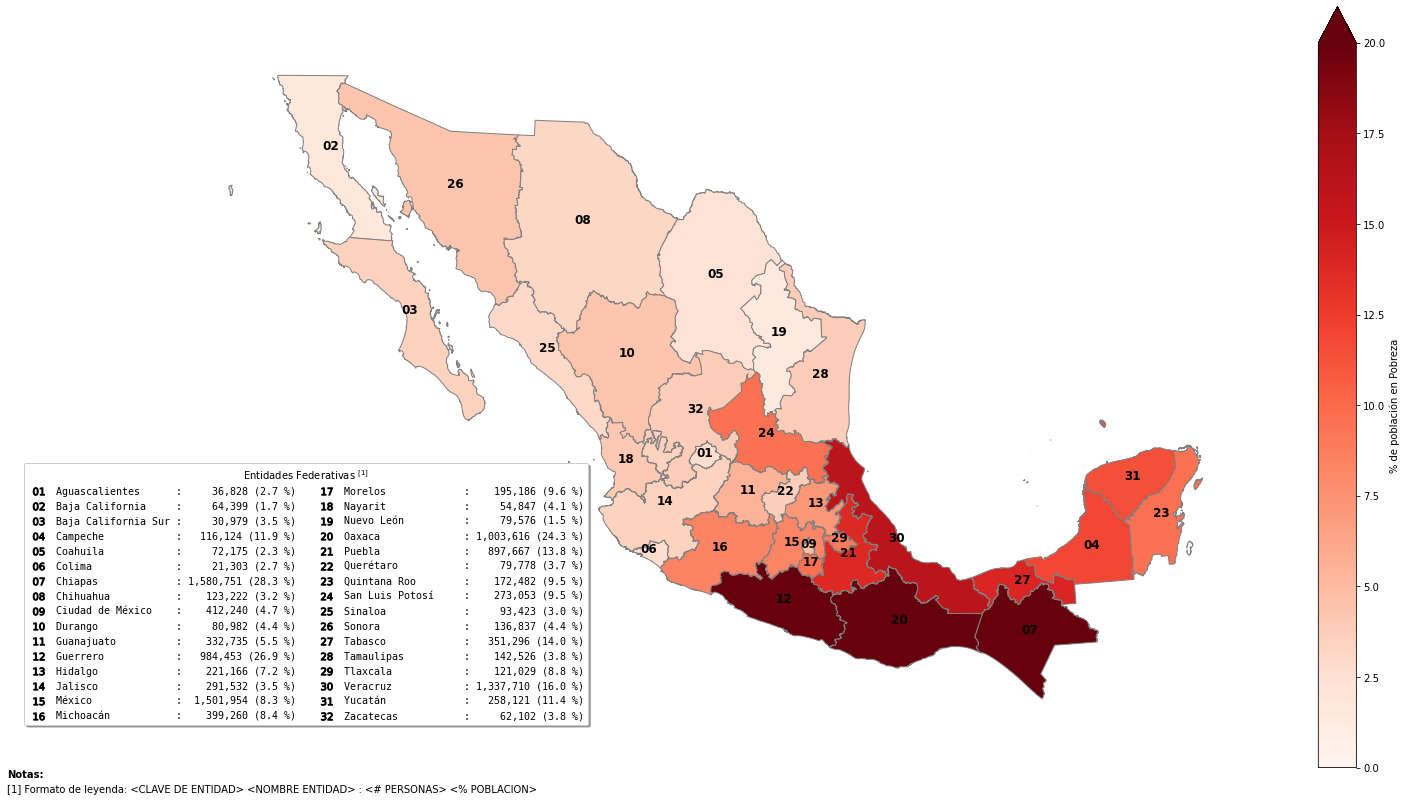

In [183]:
# plt.rcParams['text.usetex'] = True
fig, ax = plt.subplots(figsize = (24, 14))

pobent.plot('Pobreza extrema - Porcentaje 2020', cmap = 'Reds', legend = True, ax = ax, edgecolors = 'grey',
            legend_kwds = {'label': '% de población en Pobreza', 'extend': 'max'}, vmin = 0, vmax = 20)

legend_elements = []
labels = []

for i, row in pobent.iterrows():
    centroid = row.geometry.centroid
    x = centroid.x
    y = centroid.y

    entidad_federativa = row['entidad_federativa']
    resumen = row['resumen']

    label = f'{entidad_federativa:<{max_entidad+1}}:{resumen:>{max_resumen+1}}'
    labels.append(label)
    
    legend_elements.append(Line2D([0], [0], marker = f'${row["Clave de entidad"]}$', lw = 0, markersize = 12, color = 'black',
                                  label = label, markerfacecolor = 'black'))
    plt.text(x, y, row['Clave de entidad'], size = 12, ha = 'center', weight = 'bold')

plt.figtext(0.025, 0.115, 'Notas:', weight = 'bold', ha = 'left')
plt.figtext(0.025, 0.1, '[1] Formato de leyenda: <CLAVE DE ENTIDAD> <NOMBRE ENTIDAD> : <# PERSONAS> <% POBLACION>', ha = 'left')

# However, this only improves things slightly. This is because matplotlib is using a variable-width font by default, 
# meaning characters like m take up more space than characters like i. This is fixed by using a fixed-width font. 
# In matplotlib, this is achieved by:
# pl.legend(legends, loc=1, prop={'family': 'monospace'})
plt.legend(handles = legend_elements, bbox_to_anchor = (-0.15, 0), loc = 'lower left', title = 'Entidades Federativas $^{[1]}$', ncol = 2, shadow = True,
           prop = {'family': 'monospace'})

plt.axis('off')